In [909]:
# Importing libraries and dependencies necessary for the project
import pandas as pd
import pandas_ta as ta
import numpy as np

import yfinance as yf
import requests

import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use("fivethirtyeight")
import seaborn as sns

from dotenv import load_dotenv
load_dotenv()
%matplotlib inline


In [ ]:
def addNumbers(num1, num2):
    """
    This function takes two numbers, and returns the sum
    Parameters
    ----------
    num1 - Numeric - First number to add, order does not matter
    num2 - Numeric - Second number to add, order does not matter
    Example
    --------
    sumNums = addNumbers(1,2)
    print(sumNums)
    `3`
    Returns
    --------
    Numeric - Sum of numbers
    """
    return num1 + num2
    #print("helllo") # unreachable code
result = addNumbers(1,2)
result

In [975]:

def fibonacci_sequence(n):
    """
    Description
    -----------
    This function generates a sequence of numbers that is the sum of the two that precede it.
    
    Parameters
    ----------
    Next number generated: It is the sum of the last number with the second last one added to the sequence.

    Example (Xn+2= Xn+1 + Xn)
    --------
    float = [2,4,6]
    for i in range(3,n+1):
        next_number = 4 + 6
        float.append(next_number)
    return float
    
    Returns
    --------
    Numeric - Sequence of numbers
    "[2,4,6,10....]"
    """
    sequence = [0,1]
    for i in range(2,n+1):
        next_num = sequence[-1] + sequence[-2]
        sequence.append(next_num)
    return sequence

In [948]:
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD']

indices = ["SPY"] #for three years


In [957]:
# I want to analyze the Crypto Market 1 - Year Before, During, and After the Covid-19 Lockdown Period.

start_date_pre_lockdown = "2019-03-14"
end_date_pre_lockdown = "2020-04-01"
crypto_data_before_lockdown = yf.download(cryptocurrencies, start_date_pre_lockdown, end_date_pre_lockdown)


start_date_pandemic_lockdown = "2020-04-01"
end_date_pandemic_lockdown = "2021-04-30"
crypto_data_during_lockdown = yf.download(cryptocurrencies, start_date_pandemic_lockdown, end_date_pandemic_lockdown)


start_date_after_locksown = "2021-05-01"
end_date_after_lockdown = "2022-05-02"
crypto_data_after_lockdown = yf.download(cryptocurrencies, start_date_after_locksown, end_date_after_lockdown)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [958]:
pre_lockdown_closing_prices = crypto_data_before_lockdown["Close"]
pre_lockdown_closing_prices.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [964]:
daily_returns_before_lockdown=pre_lockdown_closing_prices.pct_change().dropna()
daily_returns_before_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [965]:
cumulative_return_before_lockdown = ((1 + daily_returns_before_lockdown).cumprod() - 1) *100
cumulative_return_before_lockdown.hvplot(
    label = "Cumulative returns for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

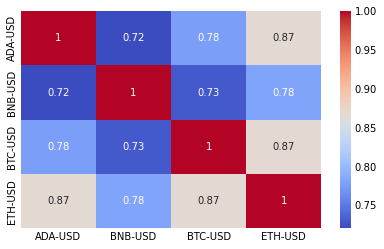

In [966]:
correlation_before_lockdown = daily_returns_before_lockdown.corr()
sns.heatmap(correlation_before_lockdown, annot=True, cmap='coolwarm')

The main advantage of adjusted closing prices is that they make it easier to evaluate stock performance. Firstly, the adjusted closing price helps investors understand how much they would have made by investing in a given asset.

In [967]:
closing_prices_during_lockdown = crypto_data_during_lockdown["Close"]
closing_prices_during_lockdown.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### As we can see from the graph above it is hard to compare the returns because they are on different price range


In [968]:
daily_returns_during_lockdown=closing_prices_during_lockdown.pct_change().dropna()
daily_returns_during_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Volatilty
### Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [969]:
cumulative_return_during_lockdown = ((1 + daily_returns_during_lockdown).cumprod() - 1) *100
cumulative_return_during_lockdown.hvplot(
    label = "Cumulative returns for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

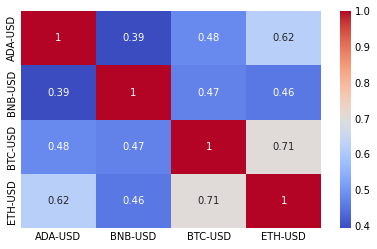

In [970]:
correlation = daily_returns_during_lockdown.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [917]:
crypto_data_after_lockdown = yf.download(cryptocurrencies, start_date_after_locksown, end_date_after_lockdown)
closing_prices_after_lockdown = crypto_data_after_lockdown["Close"]
closing_prices_after_lockdown.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cardano, Binance after the Covid-19 Lockdown period",
    width = 900,
    height = 400
    )

[*********************100%***********************]  4 of 4 completed


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [918]:
daily_returns_after_lockdown=closing_prices_after_lockdown.pct_change().dropna()
daily_returns_after_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cardano, Binance after the Covid-19 Lockdown period",
    width = 900,
    height = 400
)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [919]:
cumulative_return_after_lockdown = ((1 + daily_returns_after_lockdown).cumprod() - 1) *100
cumulative_return_after_lockdown.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

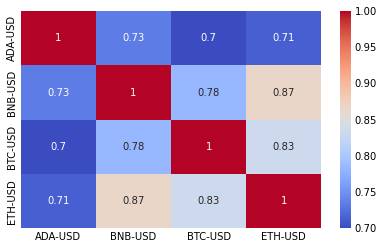

In [920]:
correlation_after_lockdown = daily_returns_after_lockdown.corr()
sns.heatmap(correlation_after_lockdown, annot=True, cmap='coolwarm')

In [921]:
BTC = yf.download("BTC-USD", start_date_pandemic_lockdown, end_date_pandemic_lockdown)
BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008
2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,33997889639
2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,45368026430
2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,38622642935
2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,37878801016
...,...,...,...,...,...,...
2021-03-10,54824.011719,57258.253906,53290.890625,56008.550781,56008.550781,57295577614
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595
2021-03-12,57821.218750,57996.621094,55376.648438,57332.089844,57332.089844,55689944702


In [922]:
BTC["Close"].hvplot(label = "Bitcoin Closing Prices during Covid-19 lockdown")

:Curve   [Date]   (Close)

In [979]:

sequence = fibonacci_sequence(20)
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


In [924]:
for i in sequence:
    rt_1 = sequence[-4] / sequence[-1]
    rt_2 = 0.5
    rt_3 = sequence[-3] / sequence[-1]    
    rt_4 = sequence[-2] / sequence[-1]
    rt_5 = 1 - rt_1

print(rt_1,rt_2,rt_3,rt_4,rt_5)

0.2360679970436068 0.5 0.3819660014781966 0.6180339985218034 0.7639320029563932


In [925]:
# Calculating the Fibonacci Retracement Level Prices with a non_Fibonacci Level/Ratio of 0.5 or 50%. 
# Three Fibonacci Ratios are that I am going to use: 0.236, 0.382 and 0.618

max_price = BTC["Close"].max()
min_price = BTC["Close"].min()

diff = max_price - min_price

first_lvl = max_price - diff * rt_1
second_lvl = max_price - diff * rt_2
third_lvl = max_price - diff * rt_3
fourth_lvl = max_price -diff * rt_4
fifth_lvl = max_price - diff * rt_5


In [926]:
print("Level Percentage      Price in USD ")
print("00.0%\t\t", max_price)
print("23.6%\t\t", first_lvl)
print("38.2%\t\t", second_lvl)
print("50.0%\t\t", third_lvl)
print("61.8%\t\t", fourth_lvl)
print("76.5%\t\t", fifth_lvl)
print("100.0%\t\t", min_price)


Level Percentage      Price in USD 
00.0%		 61243.0859375
23.6%		 47969.31155266942
38.2%		 33128.782958984375
50.0%		 39765.67015139967
61.8%		 26491.895766569083
76.5%		 18288.254365299334
100.0%		 5014.47998046875


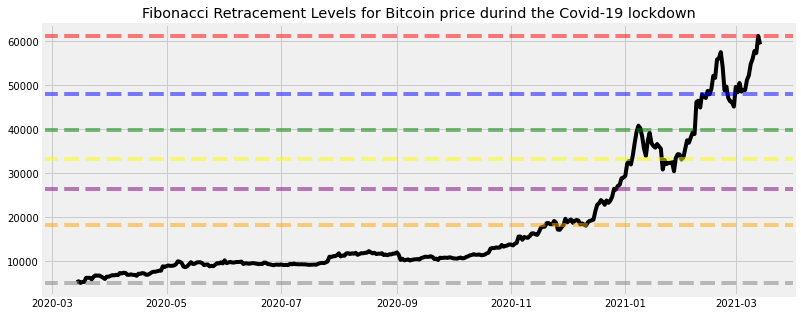

In [928]:
# Plotting the Fibonacci Level Prices with the Close price for Bitcoin during Covid-19 Lockdown

plt.figure(figsize=(12,5))
plt.plot(BTC.index, BTC["Close"], color = "black")

plt.xlabel = ("Date")
plt.ylabel = ("Price in (USD)")
plt.title("Fibonacci Retracement Levels for Bitcoin price durind the Covid-19 lockdown")

plt.axhline(max_price, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(first_lvl, linestyle = "--", alpha = 0.5, color = "blue")
plt.axhline(second_lvl, linestyle = "--", alpha = 0.5, color = "yellow")
plt.axhline(third_lvl, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(fourth_lvl, linestyle = "--", alpha = 0.5, color = "purple")
plt.axhline(fifth_lvl, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(min_price, linestyle = "--", alpha = 0.5, color = "gray")


plt.show()

In [971]:
simple_moving_average = ta.Strategy(
    name = "moving indicators",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 40},
    ]
)
BTC.ta.strategy(simple_moving_average)
BTC.ta.cores = 0

In [972]:
fig = go.Figure(data=[
    go.Candlestick(
        x=BTC.index,
        open=BTC['Open'],
        high=BTC['High'],
        low=BTC['Low'],
        close=BTC['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False,
    ),
])

In [973]:
fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['SMA_10'],
        line=dict(color='red', width=2),
        name='SMA_10',
    )
)

fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['SMA_40'],
        line=dict(color='green', width=2),
        name='SMA_40'
    )
)
fig.show()

In [938]:

BTC['golden_cross'] = (BTC['SMA_10'] > BTC['SMA_40'])
BTC[BTC['golden_cross'] == 0]

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_40,golden_cross,death_cross
Date,,,,,,,,,,
2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008,NaN,NaN,False,False
2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,33997889639,NaN,NaN,False,False
2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,45368026430,NaN,NaN,False,False
2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,38622642935,NaN,NaN,False,False
2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,37878801016,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,65141828798,32560.927930,32623.028906,False,True
2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,33114.359375,52754542671,32789.793945,32856.312158,False,True
2021-02-01,33114.578125,34638.214844,32384.228516,33537.175781,33537.175781,61400400660,32842.935352,33113.707910,False,True


In [939]:

BTC['death_cross'] = (BTC['SMA_10'] < BTC['SMA_40'])
BTC[BTC['death_cross'] == 0]

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_40,golden_cross,death_cross
Date,,,,,,,,,,
2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008,NaN,NaN,False,False
2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,33997889639,NaN,NaN,False,False
2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,45368026430,NaN,NaN,False,False
2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,38622642935,NaN,NaN,False,False
2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,37878801016,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-03-10,54824.011719,57258.253906,53290.890625,56008.550781,56008.550781,57295577614,50923.521094,46830.236621,True,False
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51740.908984,47418.626563,True,False
2021-03-12,57821.218750,57996.621094,55376.648438,57332.089844,57332.089844,55689944702,52636.219141,48024.069824,True,False
